In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python locations.py 
```
from the top level directory.

In [2]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

# sc.fill_buildings(student_df = student_df, hall_df = hall_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [14]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s, region_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a, region_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)
# Get art capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df,
                    categories = ["gender","race"])

# Get building capacity column vector.
building_capacity = sc.get_building_capacity_df().values

# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df,
                                    categories = ["gender","race"],
                                    alpha = -.0001,
                                    beta = 1000000000)

# Reduce cost df to remove duplicate columns.
cost_df = cost_df.rename(columns = {art_capacity_df.loc[i,"tuple"]:art_capacity_df.loc[i,"string"] for i in art_capacity_df.index})


cost_df

cost_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, Two or more races","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,0.095961,0.052072,0.067714,0.078353,0.054881,0.09559,0.095736,0.089032,0.091946,0.094035,0.088786,0.095893
anderson,0.097956,0.047734,0.066509,0.078425,0.049472,0.097588,0.097843,0.0893,0.092616,0.095317,0.08935,0.09789
ballou,0.096266,0.051357,0.067567,0.078453,0.053552,0.095895,0.096032,0.089194,0.09211,0.094376,0.088999,0.096198
capen_house,0.083349,0.083349,0.083349,0.083349,0.083349,0.083349,0.083349,0.083349,0.083349,0.083322,0.083184,0.083349
clic,0.097956,0.047734,0.066509,0.078425,0.049472,0.097588,0.097843,0.0893,0.092616,0.095317,0.08935,0.09789
dental_school,0.084731,0.081038,0.080389,0.081013,0.082214,0.084621,0.084701,0.083695,0.084296,0.084416,0.084196,0.084688
eaton_hall,0.095602,0.052786,0.068217,0.078542,0.055153,0.095417,0.095387,0.089128,0.091761,0.093818,0.088656,0.095534
fine_arts_house,0.096494,0.050412,0.066757,0.078827,0.053151,0.096125,0.096211,0.089707,0.092369,0.094579,0.088941,0.096426
gifford_house,0.083995,0.080989,0.082601,0.083524,0.082,0.083995,0.083984,0.083572,0.083718,0.083909,0.083717,0.083995
goddard_chapel,0.08406,0.080503,0.082443,0.083158,0.08233,0.08406,0.084045,0.083785,0.083794,0.08399,0.083773,0.08406


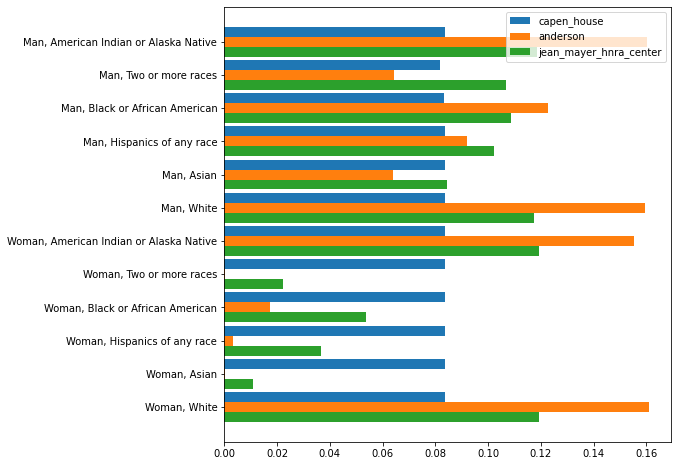

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
height = 0.3
offset = .3
for i in ["capen_house","anderson","jean_mayer_hnra_center"]:
    ax.barh(y = [j + offset for j in range(cost_df.shape[1])],
            width = cost_df.loc[i,:].values, 
            label = i,
            height = height)
    offset += -0.3
    

ax.set_yticks([j for j in range(art_capacity_df.shape[0])])
ax.set_yticklabels(art_capacity_df["string"])
plt.legend()
plt.show()

In [39]:
art_capacity_df.loc[6,"capacity"] = 5
art_capacity_df.loc[7,"capacity"] = 135
art_capacity_df["capacity"] = 1
art_capacity_df

,tuple,string,original_index,capacity
0,"(1, 1)","Woman, White",2083,1
1,"(1, 2)","Woman, Asian",1394,1
2,"(1, 3)","Woman, Hispanics of any race",1399,1
3,"(1, 4)","Woman, Black or African American",1523,1
4,"(1, 5)","Woman, Two or more races",1819,1
5,"(1, 6)","Woman, American Indian or Alaska Native",1463,1
6,"(2, 1)","Man, White",1826,1
7,"(2, 2)","Man, Asian",26,1
8,"(2, 3)","Man, Hispanics of any race",1168,1
9,"(2, 4)","Man, Black or African American",480,1


In [42]:
building_capacity[:,:] = 1
building_capacity

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [43]:
P = sc.learn_optimal_assignment(cost_df, 
                             building_capacity, 
                             art_capacity_df["capacity"].values, 
                             lam = 100) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
assignment_df = pd.DataFrame(P, index = cost_df.index,
                  columns = art_capacity_df["string"].values)

assignment_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, Two or more races","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,0.605693,0.035108,0.035087,0.049007,0.035109,0.053394,0.016025,0.039315,0.040015,0.05287,0.038377,0
anderson,0,0.987172,0,0.001212,0,0.006682,0,0,0,0.004934,0,0
ballou,0,0,0.987319,0.001309,0,0.00627,0,0,0,0.005102,0,0
capen_house,0.090018,0,0,0.909982,0,0,0,0,0,0,0,0
clic,0,0,0,0.001212,0.987173,0.006681,0,0,0,0.004934,0,0
dental_school,0,0.004629,0.004608,0.018528,0.00463,0.931098,0,0.008834,0.007313,0.01314,0.007219,0
eaton_hall,0,0,0,0.009826,0,0,0.975518,0.000133,0.000833,0.013689,0,0
fine_arts_house,0,0,0,0.00085,0,0.004596,0.000465,0.990267,0,0.003822,0,0
gifford_house,0.005784,0,0,0.005437,0,0,0,0,0.98878,0,0,0
goddard_chapel,0.015962,0.008131,0.008111,0.022026,0.008133,0,0,0.003732,0.003451,0.926502,0.003953,0


# Create Heatmap Visualization

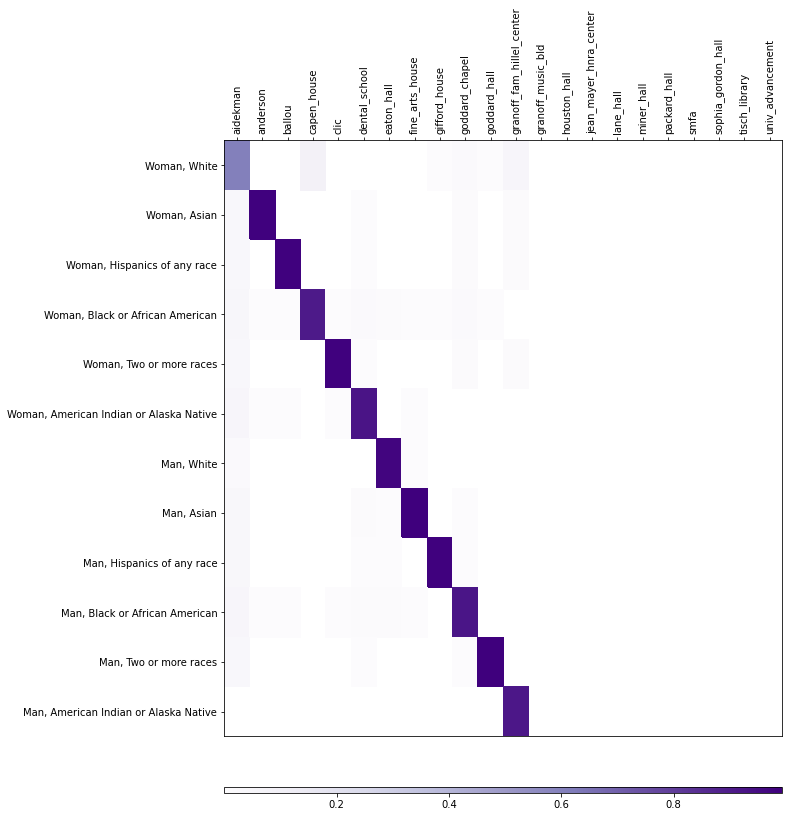

In [44]:
assignment_df = assignment_df.clip(upper = 1)
sc.assignment_heatmat(assignment_df)